# Heart Disease Analysis

### This project will focus on analyzing a sample of data on heart diesease. This data includes essential patient information that can be used to predict a patient's likelihood of contracting heart disease.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create a data frame to begin analysis
df = pd.read_csv("heart-disease.csv")

### The following table contains the data collected for this project. It includes some commonly understood factors such as age, sex, and blood pressure. More scientific factors include ca, slope, exang, and cp. CA, or coronary artery blockages, is often used as an indicator of the severity of coronary artery disease, where a higher number may indicate a greater degree of blockage or narrowing in the arteries. Slope usually represents the slope of the ST-segment on an electrocardiogram (ECG) during exercise. It's used to assess how the ST-segment changes during exercise, which can be an indicator of coronary artery disease. Exang is often short for "exercise-induced angina," which is chest pain or discomfort that occurs during physical activity or exertion. CP stands for "chest pain" and is a common symptom associated with heart disease and is used as a diagnostic criterion.

In [3]:
# Displays data frame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### This data was collected on 302 patients, where the investigated variable (target) is if the patient is diagnosed with heart disease, where 1 is considered a diagnosis of heart disease and 0 is healthy.

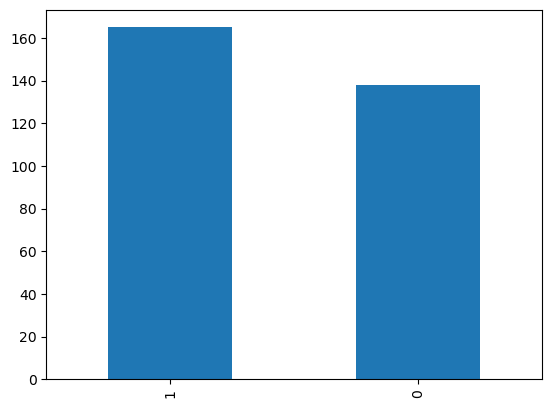

In [14]:
# Create a histogram to get a general idea of the proportion of patients with heart disease
df.target.value_counts().plot(kind="bar");

In [36]:
# This is the precise number of patients with heart disease
positive_diagnosis = np.sum(df["target"])
positive_diagnosis

165

In [38]:
# The percentage of patients with heart disease in this data set
avg_pos = (np.sum(df["target"]) / 302) * 100
avg_pos

54.63576158940398

### We can now determine that of our sample of 302 patients, 165 of them have heart disease. This is roughly 55% of our sample. With this information, we can now begin to examine our data.

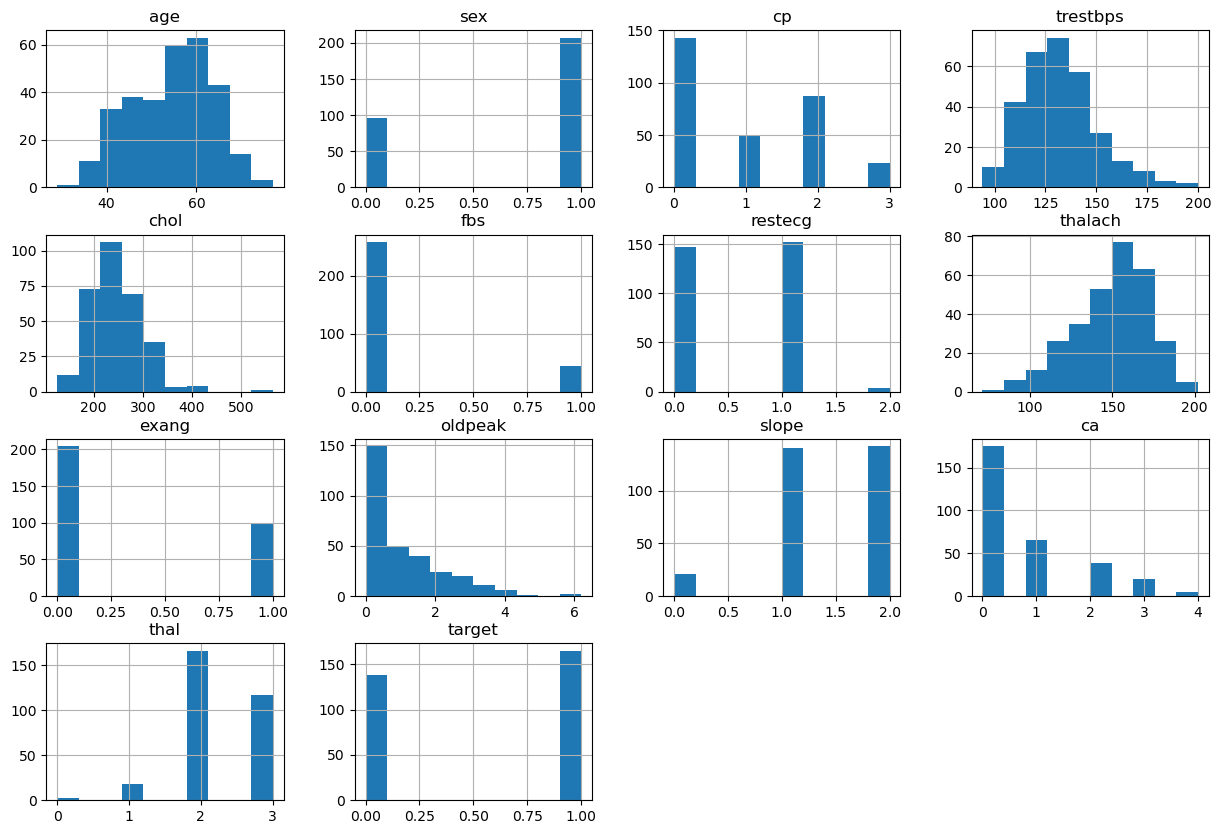

In [13]:
# Create histograms of each feature to get a general visualization of the data
df.hist(figsize=(15,10));

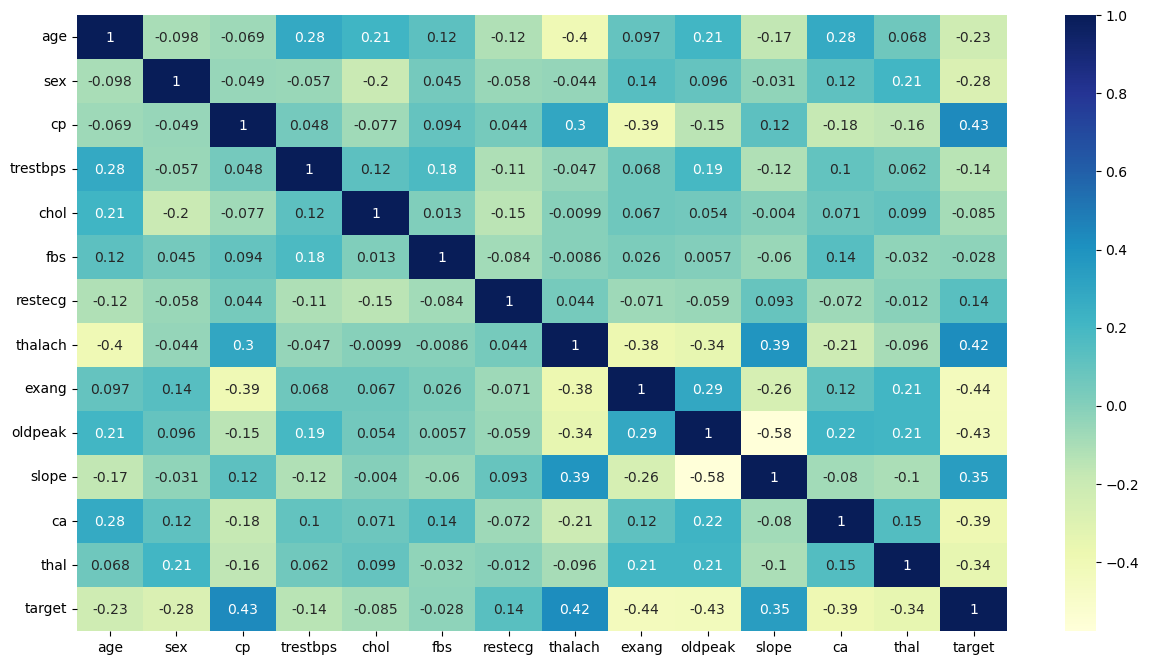

In [18]:
# Create a heatmap to examine correlations between features
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu");

### From the above correlation map we can determine that some significant factors for heart disease are age, sex, chest pain, slope, coronary artery blockages and exercise-induced angina. We can now create some visualizations to examine the relationships between each factor and heart disease.

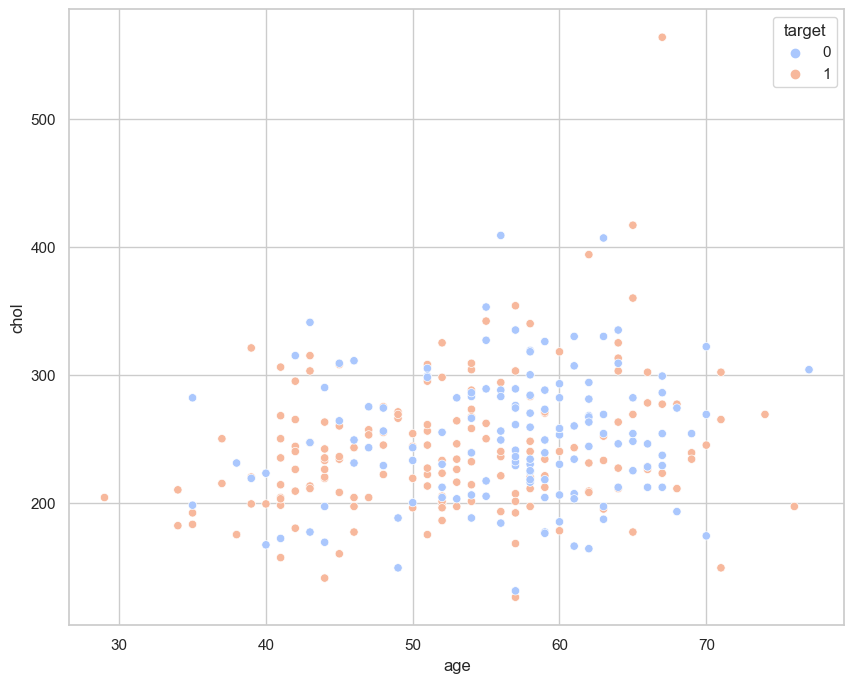

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="age", 
                y="chol", 
                data=df, 
                hue="target", 
                palette="coolwarm",);

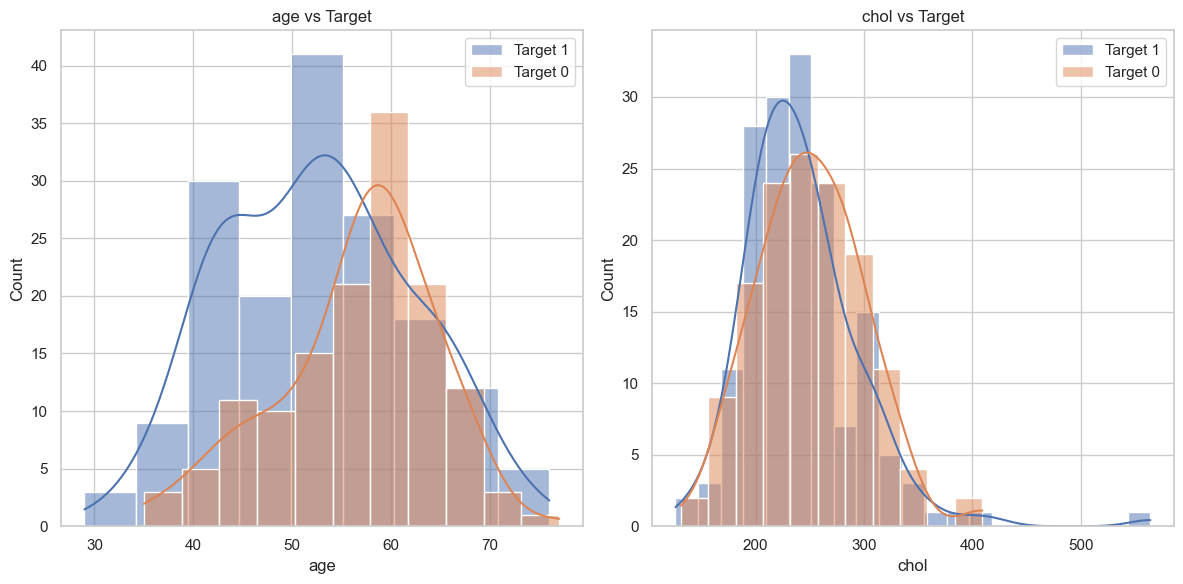

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Create histograms for 'age' and 'chol' for each target value
numeric_vars = ['age', 'chol']
for i, var in enumerate(numeric_vars):
    for target_val in df['target'].unique():
        sns.histplot(data=df[df['target'] == target_val], x=var, ax=axes[i], kde=True, label=f'Target {target_val}')
    axes[i].set_title(f'{var} vs Target')
    axes[i].legend()

plt.tight_layout()
plt.show()

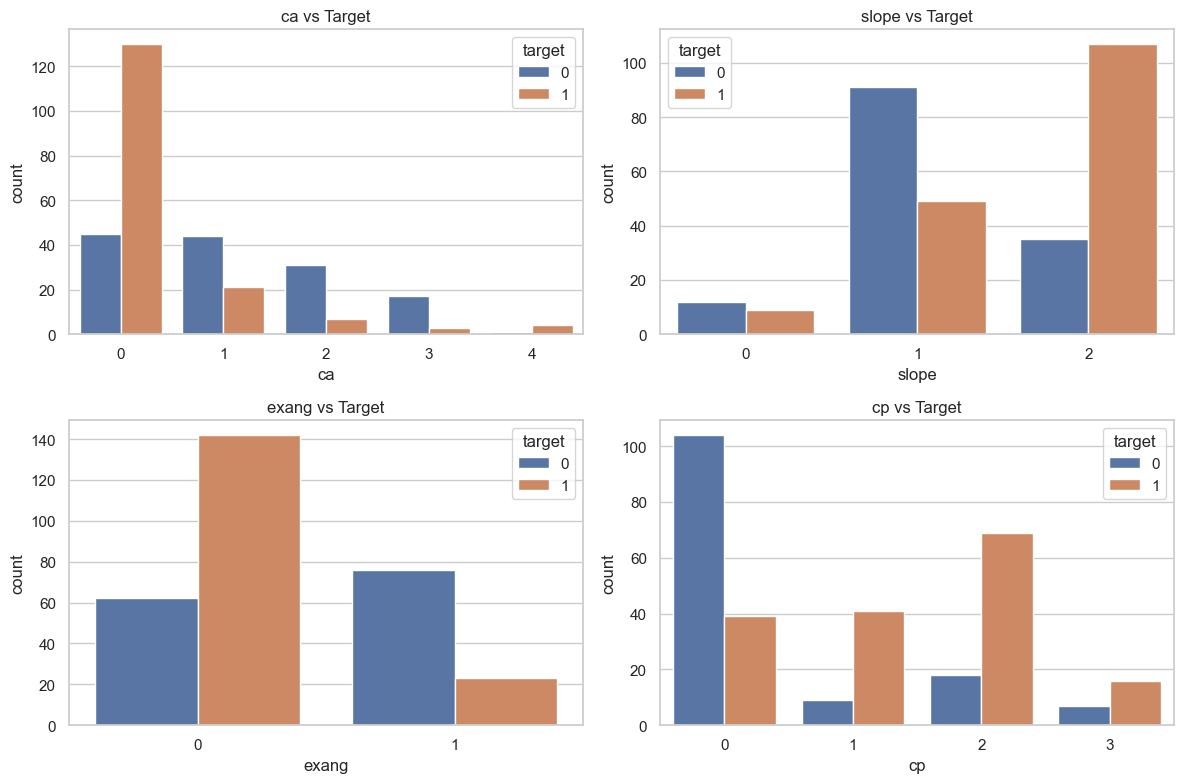

In [32]:
sns.set(style="whitegrid")  # Optional, for better style
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Create bar charts for 'ca', 'slope', 'exang', and 'cp' against 'target'
categorical_vars = ['ca', 'slope', 'exang', 'cp']
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='target', data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{var} vs Target')

plt.tight_layout()
plt.show()